In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Image Augmentation

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
x_train=train_datagen.flow_from_directory(r"C:\Users\Admin\Downloads\Flowers-Dataset\flowers\training",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [7]:
x_test=test_datagen.flow_from_directory(r"C:\Users\Admin\Downloads\Flowers-Dataset\flowers\test",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [8]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [9]:
#Create Model
model=Sequential()

In [10]:
#Convolution Layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [11]:
#Maxpooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
#Flatten or input Layer
model.add(Flatten())

In [13]:
#Dense or Hidden Layer
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))

In [14]:
model.add(Dense(units=100,kernel_initializer="random_uniform",activation="relu"))

In [15]:
#Output Layer
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

In [16]:
#Compile The Model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [17]:
#Fit The Model

In [18]:
model.fit_generator(x_train,steps_per_epoch=135,epochs=30,validation_data=x_test,validation_steps=135)


C:\Users\Admin\AppData\Local\Temp\ipykernel_41660\1407625897.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=135,epochs=30,validation_data=x_test,validation_steps=135)


Epoch 1/30
135/135 [==============================] - 50s 359ms/step - loss: 1.2947 - accuracy: 0.4348 - val_loss: 1.1609 - val_accuracy: 0.5182
Epoch 2/30
135/135 [==============================] - 41s 307ms/step - loss: 1.1279 - accuracy: 0.5319 - val_loss: 1.0818 - val_accuracy: 0.5495
Epoch 3/30
135/135 [==============================] - 41s 303ms/step - loss: 1.0509 - accuracy: 0.5742 - val_loss: 1.1639 - val_accuracy: 0.5393
Epoch 4/30
135/135 [==============================] - 42s 312ms/step - loss: 0.9853 - accuracy: 0.6095 - val_loss: 0.9657 - val_accuracy: 0.6176
Epoch 5/30
135/135 [==============================] - 48s 353ms/step - loss: 0.9360 - accuracy: 0.6379 - val_loss: 1.0048 - val_accuracy: 0.6141
Epoch 6/30
135/135 [==============================] - 46s 341ms/step - loss: 0.8820 - accuracy: 0.6488 - val_loss: 0.8447 - val_accuracy: 0.6759
Epoch 7/30
135/135 [==============================] - 61s 455ms/step - loss: 0.8607 - accuracy: 0.6648 - val_loss: 0.8128 - val_ac

In [19]:
#Save The Model
model.save("flower.h5")

In [20]:
from tensorflow.keras.models import load_model

In [21]:
from tensorflow.keras.preprocessing import image

In [22]:
import numpy as np

In [23]:
model1=load_model("flower.h5")

In [26]:
img=image.load_img(r"C:\Users\Admin\Downloads\Flowers-Dataset\4318007511_e9f4311936_n.jpg",target_size=(64,64))

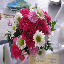

In [27]:
img

In [28]:
#Test The Model
x=image.img_to_array(img)

In [29]:
x.shape

(64, 64, 3)

In [30]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [31]:
pred=model1.predict(x)

1/1 [==============================] - 1s 669ms/step


In [32]:
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]
pred_id=pred.argmax(axis=1)[0]

In [33]:
print("Pridicted flower is ",str(class_name[pred_id]))

Pridicted flower is  Rose
